<a href="https://colab.research.google.com/github/waghvaishnav/Model-Evaluation-Fine-Tuning-in-the-Machine-Learning-Toolkit/blob/main/ROC_Curve_Receiver_Operating_Characteristic_(ROC)_curve_in_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Generate data
X, y = make_classification(
    n_samples=1000, n_features=10, n_informative=5,
    n_redundant=2, random_state=42
)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)



print(classification_report(y_test,y_pred))




              precision    recall  f1-score   support

           0       0.82      0.85      0.84       158
           1       0.83      0.79      0.81       142

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



In [ ]:
probabilities = model.predict_proba(X_test)[:,1]
# print(probabilities)

prediction = (probabilities >0.3794932025278363).astype(int)
# prediction
print(classification_report(y_test,prediction))

# Calculate ROC curve values
fpr,tpr,thresholds = roc_curve(y_test,probabilities)
fpr[:5],tpr[:5],thresholds[:5]

              precision    recall  f1-score   support

           0       0.89      0.75      0.82       158
           1       0.77      0.89      0.82       142

    accuracy                           0.82       300
   macro avg       0.83      0.82      0.82       300
weighted avg       0.83      0.82      0.82       300



(array([0.        , 0.00632911, 0.00632911, 0.01265823, 0.01265823]),
 array([0.        , 0.        , 0.27464789, 0.27464789, 0.29577465]),
 array([       inf, 0.98947079, 0.87184188, 0.86989512, 0.86295303]))

In [ ]:
tpr

array([0.        , 0.        , 0.27464789, 0.27464789, 0.29577465,
       0.29577465, 0.30985915, 0.30985915, 0.33802817, 0.33802817,
       0.38028169, 0.38028169, 0.3943662 , 0.3943662 , 0.56338028,
       0.56338028, 0.5915493 , 0.5915493 , 0.59859155, 0.59859155,
       0.63380282, 0.63380282, 0.66197183, 0.66197183, 0.66901408,
       0.66901408, 0.71126761, 0.71126761, 0.73239437, 0.73239437,
       0.75352113, 0.75352113, 0.78873239, 0.78873239, 0.79577465,
       0.79577465, 0.8028169 , 0.8028169 , 0.80985915, 0.80985915,
       0.82394366, 0.82394366, 0.86619718, 0.86619718, 0.87323944,
       0.87323944, 0.8943662 , 0.8943662 , 0.90140845, 0.90140845,
       0.94366197, 0.94366197, 0.95070423, 0.95070423, 0.96478873,
       0.96478873, 0.97183099, 0.97183099, 0.97887324, 0.97887324,
       0.98591549, 0.98591549, 0.99295775, 0.99295775, 1.        ,
       1.        ])

In [ ]:
import numpy as np
desired_recall = 0.9

closest_index = np.argmin(abs(tpr - desired_recall))

print(closest_index)

print(thresholds[closest_index])

48
0.3794932025278363


In [ ]:
fpr[closest_index]

np.float64(0.2468354430379747)

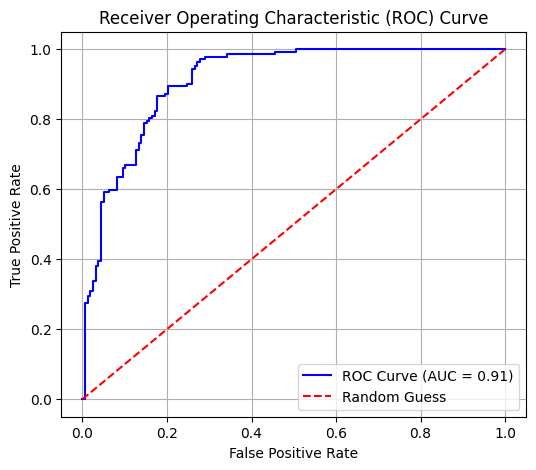

AUC Score: 0.9127741130326261


In [ ]:
# Get predicted probabilities for positive class
# y_probs = model.predict_proba(X_test)[:, 1]

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

print("AUC Score:", roc_auc_score(y_test, probabilities))


In [ ]:
roc_auc

np.float64(0.9127741130326261)